In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X-Xmean)*(Y-Ymean)).sum()
    denorminator = np.sqrt( ((X-Xmean)**2).sum() * ((Y-Ymean)**2).sum() )
    r = fraction/denorminator
    return r

In [21]:
def LR_find_ab(X, Y):
    XY = X*Y
    X2 = X**2
    Xmean = X.mean()
    Ymean = Y.mean()
    XYmean = XY.mean()
    X2mean = X2.mean()
    denorminator = X2mean - Xmean**2
    a = ( XYmean - Xmean*Ymean ) / denorminator
    b = ( X2mean*Ymean - Xmean*XYmean ) / denorminator
    return a, b

In [22]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

In [23]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [24]:
def find_SSE(Y, Yhat):
    SSE = ((Y-Yhat)**2).sum()
    return SSE

In [25]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y-Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [26]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = np.abs(Y-Yhat).sum()/N
    return MAE

In [27]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y-Yhat)/Y).sum()*100/N
    return MAPE

In [28]:
# Data = pd.read_excel('Data.xlsx')
Data = pd.read_csv('w1_ex1.csv')
# DataMatrix = Data.as_matrix() # not support
DataMatrix = Data.values

X = DataMatrix[:, 1]
Y = DataMatrix[:, 2]

In [40]:
# Data => Modeling => Pridiction
# Training Set 70% and Test Set 30%
X_Train = X# X[:70]
Y_Train = Y# Y[:70]
a, b = LR_find_ab(X_Train, Y_Train)
print(a, b)
Yhat_Train =LR_find_Yhat(X_Train, a, b)
print(Yhat_Train, len(Yhat_Train))
error_Train = find_error(Y, Yhat_Train, 'SSE')
print(error_Train)

2.0 0.999999999999994
[ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.
 12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8
 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8 17.  17.2 17.4 17.6
 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4 19.6 19.8 20.  20.2 20.4
 20.6 20.8] 100
3.527638056728636e-27


3.527638056728636e-27


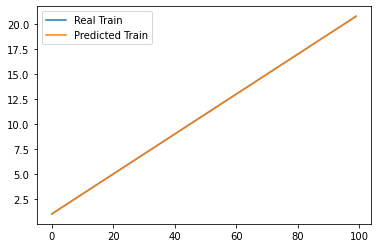

In [41]:
plt.plot(Y_Train, label='Real Train')
plt.plot(Yhat_Train, label='Predicted Train')
plt.legend()
print(error_Train)

3.527638056728636e-27


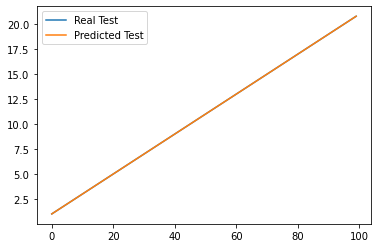

In [46]:
X_Test = X
Y_Test = Y

Yhat_Test = LR_find_Yhat(X_Test, a, b)
error_Test = find_error(Y_Test, Yhat_Test, 'SSE')

plt.plot(Y_Test, label='Real Test')
plt.plot(Yhat_Test, label='Predicted Test')
plt.legend()
print(error_Test)